In [318]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.integrate import odeint
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df = pd.read_csv(url)

In [261]:
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
dias = list(df['date'])

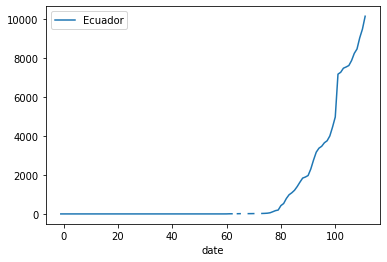

In [249]:
df.plot(x ='date', y='Ecuador')

In [262]:
filtro = df["Ecuador"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)

1835.0
2988.8297872340427


In [125]:
fx = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(fx[-1] + mediana)
print(prediccion_siguiente)

11963


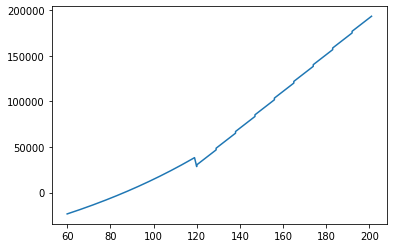

152


In [246]:
for i in range(x[-1], x[-1]+10):
    x.append(i)
    fx.append(int(fx[-1] + mediana))
plt.plot(x[61:], fx[61:])
plt.show()
print(len(x[61:]))

In [268]:
g = [100, 0.01, 200, 0.01]
n = len(x[61:])
y = np.empty(n)
for i in range(n):
    y[i] = reg_exponencial(x[i], g[0], g[1], g[2], g[3])
print(len(y))

152


In [217]:
def reg_exponencial(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3

195463


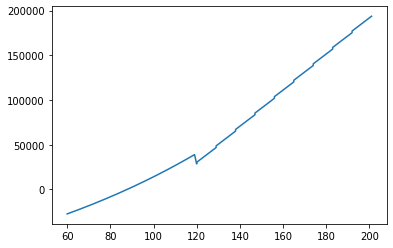

In [267]:
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(fx[-1] + mediana)
print(prediccion_siguiente)
popt, pcov = curve_fit(reg_exponencial, x[61:], fx[61:], g)
for i in range(n):
    fx[i] = reg_exponencial(x[i], popt[0], popt[1], popt[2], popt[3])
plt.plot(x[61:], fx[61:])

In [278]:
# Total de la poblacion
N = 500000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
beta, gamma = 0.4, 1.0/5 
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)

In [279]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

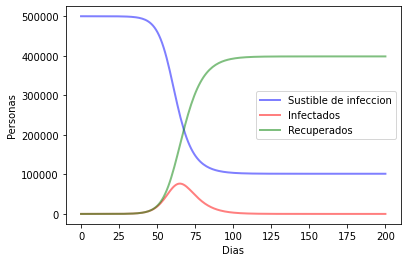

In [280]:
# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Dias')
ax.set_ylabel('Personas')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
plt.show()


#### Correlacion de variables

In [345]:
data = pd.read_csv('data.csv')
data = data[data['Country/Region'].isin(['Ecuador'])]
data.drop(['Country/Region', 'Province/State'],axis='columns', inplace=True)
# del data['Country/Region']
# del data['Province/State']
# del data['Lat']
# del data['Long']
data.corr(method="pearson")

,Lat,Long,Confirmed,Recovered,Deaths
Lat,1.000000e+00,1.000000e+00,-7.406623e-16,5.202158e-16,7.001153e-16
Long,1.000000e+00,1.000000e+00,-2.447952e-16,-7.551519e-17,-8.964891e-17
Confirmed,-7.406623e-16,-2.447952e-16,1.000000e+00,8.980980e-01,9.820961e-01
Recovered,5.202158e-16,-7.551519e-17,8.980980e-01,1.000000e+00,9.159277e-01
Deaths,7.001153e-16,-8.964891e-17,9.820961e-01,9.159277e-01,1.000000e+00


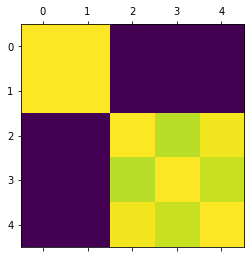

In [344]:
plt.matshow(data.corr())

### Analisis

##### Analizando los resultados de acuerdo al modelo probabilístico y teniendo el cuenta el modelo exponencial, los resultados fueron casi similares.

### Conclusiones
#### Como buena practica el uso de un modelo probabilístico es una buena opción al momento de predecir valores que necesitemos conocer para un futuro incierto, en este caso como un buen ejemplo este modelo nos ayuda de manera muy practica a ver como es el avance de  esta epidemia que ataca Ecuador, en especial a la costa, que según la correlación de variables y según la posición geográfica nos indica una fuerte relación de variables en este caso contagiados y muertos.

### Criterio Personal
#### Político, a mi parecer grupos políticos en especial en la costa ecuatoriana es mayor, pero no por ayudar a la gente, más bien de hacer publicidad política para ganar su simpatía, poco o nada les importa las personas que sufren esto desde el inicio de la pandemia.

#### Económico, es un golpe muy duro para la economía del Ecuador que por cierto no es tan buen ya que gracias a los encargados de mandos o personas que deben manejar esto, no han hecho su mejor trabajo, a pesar de que hoy por día el petroleo ha bajado a menos de '1' dolar, nuestros representantes no les importa mucho.

#### Social, en cuanto a la sociedad de igual manera es un golpe muy duro, ya que somos nosotros los que vivimos el día a día con esta pandemia, quizás muchas personas ya no tenga que comer, lamentablemente lo viven muchas personas en todo el Ecuador.